# Домашнее задание 3

По следующему адресу представлен датасет с негативными / нейтральными комментариями на русском языке:

https://www.kaggle.com/datasets/blackmoon/russian-language-toxic-comments/data

Необходимо разделить датасет на обучающую и тестовую выборку. В соотношении 90/10% соответственно.

Далее нужно обучить бинарный классификатор, замерить метрику F-score.

Вы можете использовать как линейные модели, так и дообучать трансформеры. Можно
обучить несколько разных классификаторов и сравнить их качество.

**Установка необходимых модулей**

In [1]:
pip install pymorphy3

Note: you may need to restart the kernel to use updated packages.


**Импорт библиотек**

In [70]:
from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import pymorphy3
import string

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

**Загрузка датасета**

In [3]:
data = pd.read_csv(r"C:\Users\GorokhovSN\Documents\LLM\labeled.csv")

**Выведем первые 5 строк датасета**

In [4]:
data.head()

,comment,toxic
0,"Верблюдов-то за что? Дебилы, бл...\n",1.0
1,"Хохлы, это отдушина затюканого россиянина, мол...",1.0
2,Собаке - собачья смерть\n,1.0
3,"Страницу обнови, дебил. Это тоже не оскорблени...",1.0
4,"тебя не убедил 6-страничный пдф в том, что Скр...",1.0


**Проверим на наличие нулевых значений**

In [5]:
data.isnull().sum()

comment    0
toxic      0
dtype: int64

**Выведем распределение датасета по токсичности**

<Axes: xlabel='toxic'>

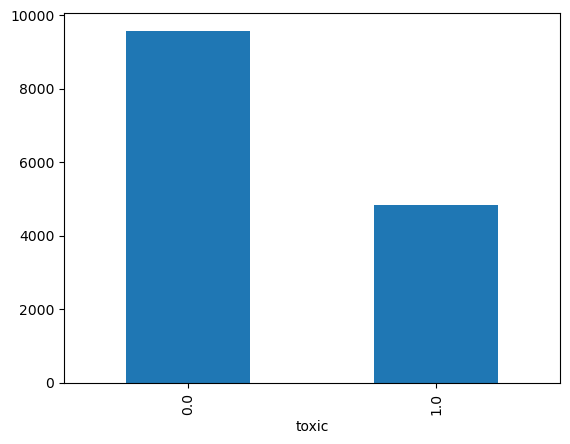

In [6]:
toxic_distr = data['toxic'].value_counts()
toxic_distr.plot(kind='bar')

## Без предобработки текста

**Прежде всего - оценка датасета без предобработки, далее - обучение на нём классификаторов и анализ качества**

In [7]:
comments = data['comment'].values
labels = data['toxic'].values

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(
    comments,
    labels,
    test_size=0.1,
    random_state=1,
)
X_train[:3], Y_train[:3]

(array(['Ну я смотрю - давай, облей меня говном.\n',
        'Любимый мой анекдот. Ибо часто попадаются клиенты с вопросом- КУЛЕ ТАК ДОРОГО??? Работаю автоэлектриком',
        'Все зависит от региона. В своей области я устраивался и зп была 15-18к, а клиентоориентированность похоже покурить вышла, установка одна - абонент всегда врет, если хочет отключиться - делай что хочешь, но 5 возражений должен отработать. И на сладкое. Меня лишили части зарплаты, за то что программа зафиксоровала мое якобы отсутствие в течении 3-4х часов, на протяжении месяца.\n'],
       dtype=object),
 array([1., 0., 0.]))

In [9]:
print(f'len(X_train) = {len(X_train)}')
print(f'len(y_train) = {len(Y_train)}')
print(f'len(X_test) = {len(X_test)}')
print(f'len(y_test) = {len(Y_test)}')

len(X_train) = 12970
len(y_train) = 12970
len(X_test) = 1442
len(y_test) = 1442


### Используя мешок слов (Bag-of-words) для представления текста, получаем слудующее

In [10]:
c_vect = CountVectorizer(max_features=30_000)
X_train_bow = c_vect.fit_transform(X_train)
X_test_bow = c_vect.transform(X_test)

**Обучим наши классификаторы:**

**Логистическая регрессия**

In [11]:
%%time
logreg = LogisticRegression(random_state= 1)
logreg.fit(X_train_bow, Y_train)
logreg_predict = logreg.predict(X_test_bow)
print(classification_report(Y_test, logreg_predict))

              precision    recall  f1-score   support

         0.0       0.86      0.93      0.90       948
         1.0       0.84      0.71      0.77       494

    accuracy                           0.86      1442
   macro avg       0.85      0.82      0.83      1442
weighted avg       0.86      0.86      0.85      1442

CPU times: total: 875 ms
Wall time: 646 ms


**Линейный метод опорных векторов**

In [12]:
%%time
linsvc = LinearSVC(random_state= 1)
linsvc.fit(X_train_bow, Y_train)
linsvc_predict = linsvc.predict(X_test_bow)
print(classification_report(Y_test, linsvc_predict))

              precision    recall  f1-score   support

         0.0       0.87      0.89      0.88       948
         1.0       0.78      0.74      0.76       494

    accuracy                           0.84      1442
   macro avg       0.83      0.82      0.82      1442
weighted avg       0.84      0.84      0.84      1442

CPU times: total: 391 ms
Wall time: 390 ms


**Дерево решений**

In [13]:
%%time
dectree = DecisionTreeClassifier(random_state= 1)
dectree.fit(X_train_bow, Y_train)
dectree_predict = dectree.predict(X_test_bow)
print(classification_report(Y_test, dectree_predict))

              precision    recall  f1-score   support

         0.0       0.79      0.82      0.81       948
         1.0       0.63      0.57      0.60       494

    accuracy                           0.74      1442
   macro avg       0.71      0.70      0.70      1442
weighted avg       0.73      0.74      0.74      1442

CPU times: total: 4.88 s
Wall time: 5 s


**Случайный лес**

In [14]:
%%time
randfor = RandomForestClassifier(random_state= 1)
randfor.fit(X_train_bow, Y_train)
randfor_predict = randfor.predict(X_test_bow)
print(classification_report(Y_test, randfor_predict))

              precision    recall  f1-score   support

         0.0       0.80      0.91      0.85       948
         1.0       0.77      0.56      0.65       494

    accuracy                           0.79      1442
   macro avg       0.79      0.74      0.75      1442
weighted avg       0.79      0.79      0.78      1442

CPU times: total: 1min
Wall time: 1min 1s


**Гауссовский наивный байесовский классификатор**

In [15]:
%%time
GNB = GaussianNB()
GNB.fit(X_train_bow.toarray(), Y_train)
GNB_predict = GNB.predict(X_test_bow.toarray())
print(classification_report(Y_test, GNB_predict))

              precision    recall  f1-score   support

         0.0       0.87      0.76      0.81       948
         1.0       0.63      0.78      0.70       494

    accuracy                           0.77      1442
   macro avg       0.75      0.77      0.76      1442
weighted avg       0.79      0.77      0.77      1442

CPU times: total: 6.45 s
Wall time: 6.51 s


**Мультиномиальный наивный байесовский классификатор**

In [16]:
%%time
MNB = MultinomialNB()
MNB.fit(X_train_bow, Y_train)
MNB_predict = MNB.predict(X_test_bow)
print(classification_report(Y_test, MNB_predict))

              precision    recall  f1-score   support

         0.0       0.87      0.94      0.91       948
         1.0       0.87      0.74      0.80       494

    accuracy                           0.87      1442
   macro avg       0.87      0.84      0.85      1442
weighted avg       0.87      0.87      0.87      1442

CPU times: total: 0 ns
Wall time: 9.15 ms


**K-ближайших соседей**

In [17]:
%%time
KNN = KNeighborsClassifier()
KNN.fit(X_train_bow, Y_train)
KNN_predict = KNN.predict(X_test_bow)
print(classification_report(Y_test, KNN_predict))

              precision    recall  f1-score   support

         0.0       0.79      0.47      0.59       948
         1.0       0.43      0.76      0.55       494

    accuracy                           0.57      1442
   macro avg       0.61      0.62      0.57      1442
weighted avg       0.67      0.57      0.58      1442

CPU times: total: 484 ms
Wall time: 482 ms


Из результата видно, что лучше всего себя показали следующие классификаторы:
1. Мультиномиальный наивный Байес
2. Логистическая регрессия
3. Линейный метод опорных векторов

#### Другие гиперпараметры:

**Линейный метод опорных векторов**

In [18]:
linSVC_params = { 
                'C': np.arange(0.01,10,0.5),
                }
linsvc_optimized = GridSearchCV(linsvc, linSVC_params, cv=5, scoring='f1_weighted', return_train_score=True)
linsvc_optimized.fit(X_train_bow, Y_train)
linsvc_optimized.best_estimator_

LinearSVC(C=0.51, random_state=1)

In [19]:
linsvc_optimized.best_score_

0.84799136900515

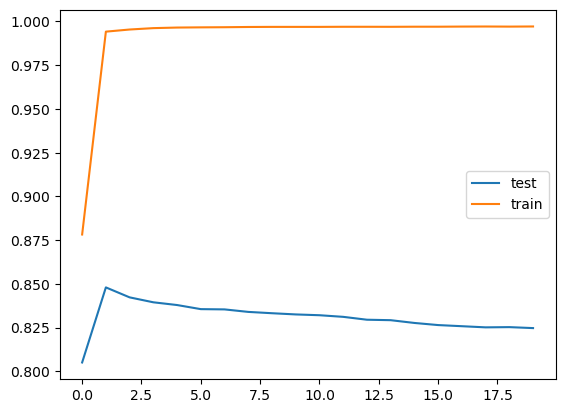

In [20]:
test_scores = linsvc_optimized.cv_results_['mean_test_score']
train_scores = linsvc_optimized.cv_results_['mean_train_score'] 
plt.plot(test_scores, label='test')
plt.plot(train_scores, label='train')
plt.legend(loc='best')
plt.show()

In [21]:
linsvc_optimized_predict = linsvc_optimized.predict(X_test_bow)
print(classification_report(Y_test, linsvc_optimized_predict))

              precision    recall  f1-score   support

         0.0       0.87      0.90      0.89       948
         1.0       0.80      0.74      0.77       494

    accuracy                           0.85      1442
   macro avg       0.83      0.82      0.83      1442
weighted avg       0.85      0.85      0.85      1442



**Дерево решений**

In [22]:
dectree_params = {
                  'max_depth': np.arange (80, 100, 10),
                  'min_samples_leaf': np.arange (1, 16, 4),
                  'min_samples_split': np.arange (80, 90, 1) 
                 }
dectree_optimized = GridSearchCV(dectree, dectree_params, cv=5, scoring='f1_weighted', return_train_score=True)
dectree_optimized.fit(X_train_bow, Y_train)
dectree_optimized.best_estimator_

DecisionTreeClassifier(max_depth=90, min_samples_split=88, random_state=1)

In [23]:
dectree_optimized.best_score_

0.7446431377530144

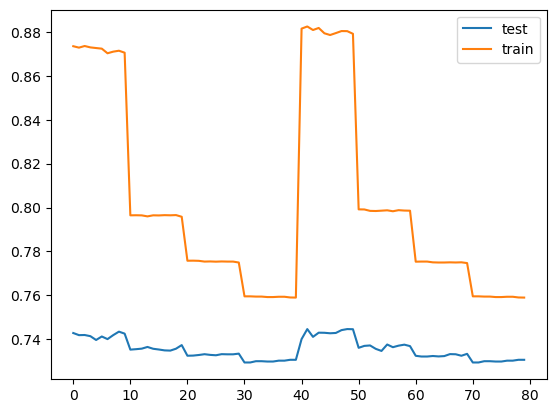

In [24]:
test_scores = dectree_optimized.cv_results_['mean_test_score']
train_scores = dectree_optimized.cv_results_['mean_train_score'] 
plt.plot(test_scores, label='test')
plt.plot(train_scores, label='train')
plt.legend(loc='best')
plt.show()

In [25]:
dectree_optimized_predict = dectree_optimized.predict(X_test_bow)
print(classification_report(Y_test, dectree_optimized_predict))

              precision    recall  f1-score   support

         0.0       0.80      0.83      0.82       948
         1.0       0.65      0.61      0.63       494

    accuracy                           0.75      1442
   macro avg       0.73      0.72      0.72      1442
weighted avg       0.75      0.75      0.75      1442



**Случайный лес**

In [26]:
randfor_params = { 
                'n_estimators': np.arange (50, 70, 5),
                'max_depth': np.arange (550,700, 50),
                'min_samples_leaf': np.arange (1,100, 20),
                'min_samples_split': np.arange (80,100,5) 
                 }
randfor_optimized = RandomizedSearchCV(randfor, randfor_params, cv=5, scoring='f1_weighted', return_train_score=True)
randfor_optimized.fit(X_train_bow, Y_train)
randfor_optimized.best_estimator_

RandomForestClassifier(max_depth=550, min_samples_split=85, n_estimators=65,
                       random_state=1)

In [27]:
randfor_optimized.best_score_

0.7682069836643255

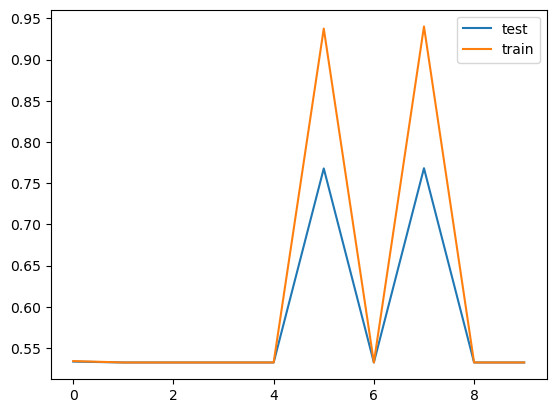

In [28]:
test_scores = randfor_optimized.cv_results_['mean_test_score']
train_scores = randfor_optimized.cv_results_['mean_train_score'] 
plt.plot(test_scores, label='test')
plt.plot(train_scores, label='train')
plt.legend(loc='best')
plt.show()

In [29]:
randfor_optimized_predict = randfor_optimized.predict(X_test_bow)
print(classification_report(Y_test, randfor_optimized_predict))

              precision    recall  f1-score   support

         0.0       0.78      0.93      0.85       948
         1.0       0.79      0.50      0.62       494

    accuracy                           0.79      1442
   macro avg       0.79      0.72      0.73      1442
weighted avg       0.79      0.79      0.77      1442



**Мультиномиальный наивный байесовский классификатор**

In [30]:
MNB_params = { 
                'alpha' : np.arange (0.5, 0.7, 0.001)
             }
MNB_optimized = GridSearchCV(MNB, MNB_params, cv=5, scoring='f1_weighted', return_train_score=True)
MNB_optimized.fit(X_train_bow, Y_train)
MNB_optimized.best_estimator_

MultinomialNB(alpha=0.541)

In [31]:
MNB_optimized.best_score_

0.8784434570433494

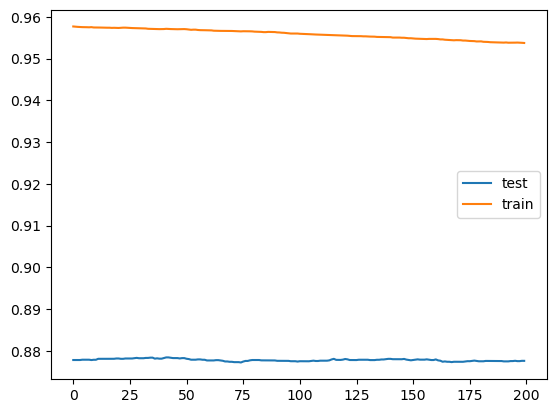

In [32]:
test_scores = MNB_optimized.cv_results_['mean_test_score']
train_scores = MNB_optimized.cv_results_['mean_train_score'] 
plt.plot(test_scores, label='test')
plt.plot(train_scores, label='train')
plt.legend(loc='best')
plt.show()

In [33]:
MNB_optimized_predict = MNB_optimized.predict(X_test_bow)
print(classification_report(Y_test, MNB_optimized_predict))

              precision    recall  f1-score   support

         0.0       0.89      0.93      0.91       948
         1.0       0.86      0.78      0.81       494

    accuracy                           0.88      1442
   macro avg       0.87      0.85      0.86      1442
weighted avg       0.88      0.88      0.88      1442



**K-ближайших соседей**

In [34]:
KNN_params = { 
                'n_neighbors': np.arange (1, 20, 1)
             }
KNN_optimized = GridSearchCV(KNN, KNN_params, cv=5, scoring='f1_weighted', return_train_score=True)
KNN_optimized.fit(X_train_bow, Y_train)
KNN_optimized.best_estimator_

KNeighborsClassifier(n_neighbors=2)

In [35]:
KNN_optimized.best_score_

0.6306349628095772

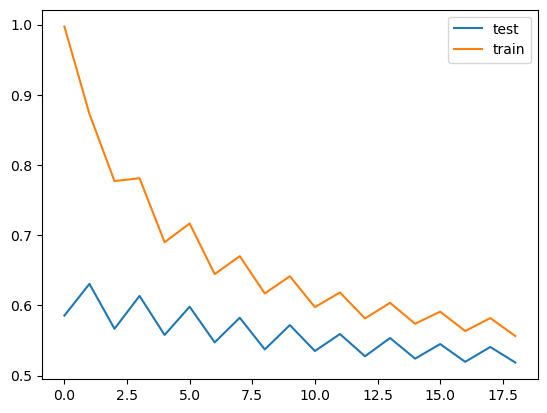

In [36]:
test_scores = KNN_optimized.cv_results_['mean_test_score']
train_scores = KNN_optimized.cv_results_['mean_train_score'] 
plt.plot(test_scores, label='test')
plt.plot(train_scores, label='train')
plt.legend(loc='best')
plt.show()

In [37]:
KNN_optimized_predict = KNN_optimized.predict(X_test_bow)
print(classification_report(Y_test, KNN_optimized_predict))

              precision    recall  f1-score   support

         0.0       0.71      0.71      0.71       948
         1.0       0.44      0.45      0.45       494

    accuracy                           0.62      1442
   macro avg       0.58      0.58      0.58      1442
weighted avg       0.62      0.62      0.62      1442



**Подбор оптимальных гиперпараметров дал прирост в KNN, прочие изменения незначительны.**

### Другой метод - Term Frequency - Inverse Document Frequency method (TF-IDF)

In [38]:
idf_vect = TfidfVectorizer(max_features=30_000)
X_train_idf = idf_vect.fit_transform(X_train)
X_test_idf = idf_vect.transform(X_test)

**Логистическая регрессия**

In [39]:
%%time
logreg.fit(X_train_idf, Y_train)
logreg_predict = logreg.predict(X_test_idf)
print(classification_report(Y_test, logreg_predict))

              precision    recall  f1-score   support

         0.0       0.82      0.96      0.88       948
         1.0       0.88      0.60      0.71       494

    accuracy                           0.83      1442
   macro avg       0.85      0.78      0.80      1442
weighted avg       0.84      0.83      0.82      1442

CPU times: total: 922 ms
Wall time: 634 ms


**Линейный метод опорных векторов**

In [40]:
%%time
linsvc.fit(X_train_idf, Y_train)
linsvc_predict = linsvc.predict(X_test_idf)
print(classification_report(Y_test, linsvc_predict))

              precision    recall  f1-score   support

         0.0       0.87      0.93      0.90       948
         1.0       0.84      0.73      0.78       494

    accuracy                           0.86      1442
   macro avg       0.85      0.83      0.84      1442
weighted avg       0.86      0.86      0.86      1442

CPU times: total: 46.9 ms
Wall time: 43.8 ms


**Дерево решений**

In [41]:
%%time
dectree.fit(X_train_idf, Y_train)
dectree_predict = dectree.predict(X_test_idf)
print(classification_report(Y_test, dectree_predict))

              precision    recall  f1-score   support

         0.0       0.79      0.81      0.80       948
         1.0       0.61      0.57      0.59       494

    accuracy                           0.73      1442
   macro avg       0.70      0.69      0.70      1442
weighted avg       0.73      0.73      0.73      1442

CPU times: total: 6.61 s
Wall time: 6.75 s


**Случайный лес**

In [42]:
%%time
randfor.fit(X_train_idf, Y_train)
randfor_predict = randfor.predict(X_test_idf)
print(classification_report(Y_test, randfor_predict))

              precision    recall  f1-score   support

         0.0       0.79      0.91      0.85       948
         1.0       0.76      0.52      0.62       494

    accuracy                           0.78      1442
   macro avg       0.77      0.72      0.73      1442
weighted avg       0.78      0.78      0.77      1442

CPU times: total: 56.4 s
Wall time: 58 s


**Гауссовский наивный байесовский классификатор**

In [43]:
%%time
GNB.fit(X_train_idf.toarray(), Y_train)
GNB_predict = GNB.predict(X_test_idf.toarray())
print(classification_report(Y_test, GNB_predict))

              precision    recall  f1-score   support

         0.0       0.84      0.79      0.82       948
         1.0       0.64      0.72      0.68       494

    accuracy                           0.77      1442
   macro avg       0.74      0.76      0.75      1442
weighted avg       0.78      0.77      0.77      1442

CPU times: total: 5.97 s
Wall time: 6.07 s


**Мультиномиальный наивный байесовский классификатор**

In [44]:
%%time
MNB.fit(X_train_idf, Y_train)
MNB_predict = MNB.predict(X_test_idf)
print(classification_report(Y_test, MNB_predict))

              precision    recall  f1-score   support

         0.0       0.75      0.99      0.86       948
         1.0       0.94      0.38      0.54       494

    accuracy                           0.78      1442
   macro avg       0.85      0.68      0.70      1442
weighted avg       0.82      0.78      0.75      1442

CPU times: total: 15.6 ms
Wall time: 12.8 ms


**K-ближайших соседей**

In [45]:
%%time
KNN.fit(X_train_idf, Y_train)
KNN_predict = KNN.predict(X_test_idf)
print(classification_report(Y_test, KNN_predict))

              precision    recall  f1-score   support

         0.0       0.86      0.01      0.01       948
         1.0       0.34      1.00      0.51       494

    accuracy                           0.35      1442
   macro avg       0.60      0.50      0.26      1442
weighted avg       0.68      0.35      0.18      1442

CPU times: total: 13.8 s
Wall time: 1.31 s


В целом результаты примерно одинаковые, но здесь:
1. Линейный метод опорных векторов
2. Логистическая регрессия
3. Гауссовский наивый Байес/случайный лес

#### Далее имеет смысл подобрать оптимальные гиперпараметры для классификаторов и посмотреть, насколько улучшатся показатели:

**Линейный метод опорных векторов**

In [46]:
linSVC_params = { 
                'C': np.arange(0.01,10,0.5),
                }
linsvc_optimized = GridSearchCV(linsvc, linSVC_params, cv=5, scoring='f1_weighted', return_train_score=True)
linsvc_optimized.fit(X_train_idf, Y_train)
linsvc_optimized.best_estimator_

LinearSVC(C=1.01, random_state=1)

In [47]:
linsvc_optimized.best_score_

0.8591629961866396

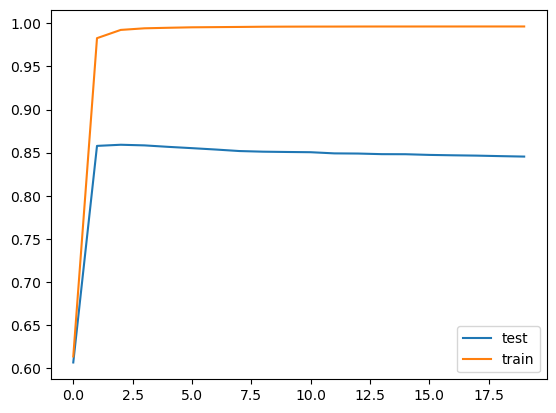

In [48]:
test_scores = linsvc_optimized.cv_results_['mean_test_score']
train_scores = linsvc_optimized.cv_results_['mean_train_score'] 
plt.plot(test_scores, label='test')
plt.plot(train_scores, label='train')
plt.legend(loc='best')
plt.show()

In [49]:
linsvc_optimized_predict = linsvc_optimized.predict(X_test_idf)
print(classification_report(Y_test, linsvc_optimized_predict))

              precision    recall  f1-score   support

         0.0       0.87      0.93      0.90       948
         1.0       0.84      0.73      0.78       494

    accuracy                           0.86      1442
   macro avg       0.85      0.83      0.84      1442
weighted avg       0.86      0.86      0.86      1442



**Дерево решений**

In [50]:
dectree_params = {
                  'max_depth': np.arange (60, 120, 10),
                  'min_samples_leaf': np.arange (1, 16, 4),
                  'min_samples_split': np.arange (60, 100, 1) 
                 }
dectree_optimized = RandomizedSearchCV(dectree, dectree_params, cv=5, scoring='f1_weighted', return_train_score=True)
dectree_optimized.fit(X_train_idf, Y_train)
dectree_optimized.best_estimator_

DecisionTreeClassifier(max_depth=110, min_samples_split=98, random_state=1)

In [51]:
dectree_optimized.best_score_

0.7333669194134438

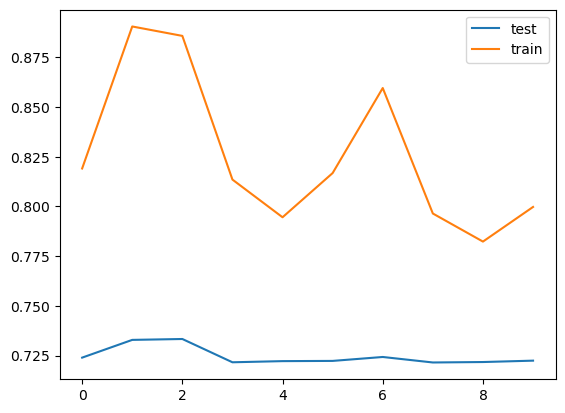

In [52]:
test_scores = dectree_optimized.cv_results_['mean_test_score']
train_scores = dectree_optimized.cv_results_['mean_train_score'] 
plt.plot(test_scores, label='test')
plt.plot(train_scores, label='train')
plt.legend(loc='best')
plt.show()

In [53]:
dectree_optimized_predict = dectree_optimized.predict(X_test_idf)
print(classification_report(Y_test, dectree_optimized_predict))

              precision    recall  f1-score   support

         0.0       0.79      0.80      0.80       948
         1.0       0.61      0.60      0.60       494

    accuracy                           0.73      1442
   macro avg       0.70      0.70      0.70      1442
weighted avg       0.73      0.73      0.73      1442



**Случайный лес**

In [54]:
randfor_params = { 
                'n_estimators': np.arange (1, 100, 1),
                'max_depth': np.arange (1,1000, 20),
                'min_samples_leaf': np.arange (1,50, 1),
                'min_samples_split': np.arange (2,6,1) 
                 }
randfor_optimized = RandomizedSearchCV(randfor, randfor_params, cv=5, scoring='f1_weighted', return_train_score=True)
randfor_optimized.fit(X_train_idf, Y_train)
randfor_optimized.best_estimator_

RandomForestClassifier(max_depth=381, min_samples_leaf=9, min_samples_split=4,
                       n_estimators=5, random_state=1)

In [55]:
randfor_optimized.best_score_

0.6314963188176763

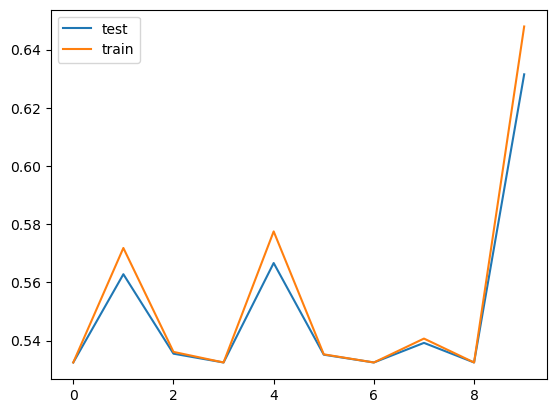

In [56]:
test_scores = randfor_optimized.cv_results_['mean_test_score']
train_scores = randfor_optimized.cv_results_['mean_train_score'] 
plt.plot(test_scores, label='test')
plt.plot(train_scores, label='train')
plt.legend(loc='best')
plt.show()

In [57]:
randfor_optimized_predict = randfor_optimized.predict(X_test_idf)
print(classification_report(Y_test, randfor_optimized_predict))

              precision    recall  f1-score   support

         0.0       0.70      0.98      0.82       948
         1.0       0.83      0.19      0.31       494

    accuracy                           0.71      1442
   macro avg       0.76      0.59      0.56      1442
weighted avg       0.74      0.71      0.64      1442



**Мультиномиальный наивный байесовский классификатор**

In [58]:
MNB_params = { 
                'alpha' : np.arange (0.001, 0.7, 0.01)
             }
MNB_optimized = GridSearchCV(MNB, MNB_params, cv=5, scoring='f1_weighted', return_train_score=True)
MNB_optimized.fit(X_train_idf, Y_train)
MNB_optimized.best_estimator_

MultinomialNB(alpha=0.09099999999999998)

In [59]:
MNB_optimized.best_score_

0.8721590676059685

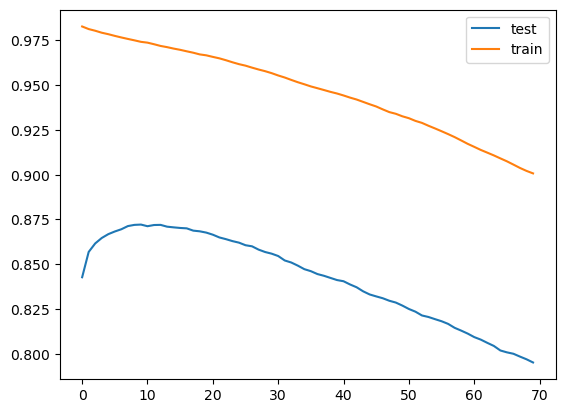

In [60]:
test_scores = MNB_optimized.cv_results_['mean_test_score']
train_scores = MNB_optimized.cv_results_['mean_train_score'] 
plt.plot(test_scores, label='test')
plt.plot(train_scores, label='train')
plt.legend(loc='best')
plt.show()

In [61]:
MNB_optimized_predict = MNB_optimized.predict(X_test_idf)
print(classification_report(Y_test, MNB_optimized_predict))

              precision    recall  f1-score   support

         0.0       0.86      0.95      0.91       948
         1.0       0.89      0.70      0.79       494

    accuracy                           0.87      1442
   macro avg       0.88      0.83      0.85      1442
weighted avg       0.87      0.87      0.86      1442



**K-ближайших соседей**

In [62]:
KNN_params = { 
                'n_neighbors': np.arange (35, 60, 1)
             }
KNN_optimized = GridSearchCV(KNN, KNN_params, cv=5, scoring='f1_weighted', return_train_score=True)
KNN_optimized.fit(X_train_idf, Y_train)
KNN_optimized.best_estimator_

KNeighborsClassifier(n_neighbors=43)

In [63]:
KNN_optimized.best_score_

0.8349544417996502

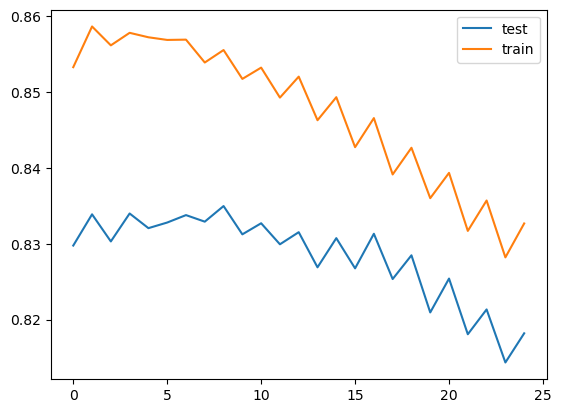

In [64]:
test_scores = KNN_optimized.cv_results_['mean_test_score']
train_scores = KNN_optimized.cv_results_['mean_train_score'] 
plt.plot(test_scores, label='test')
plt.plot(train_scores, label='train')
plt.legend(loc='best')
plt.show()

In [65]:
KNN_optimized_predict = KNN_optimized.predict(X_test_idf)
print(classification_report(Y_test, KNN_optimized_predict))

              precision    recall  f1-score   support

         0.0       0.89      0.85      0.87       948
         1.0       0.74      0.80      0.77       494

    accuracy                           0.84      1442
   macro avg       0.82      0.83      0.82      1442
weighted avg       0.84      0.84      0.84      1442



**В данном случае очень хороший прирост у Мультиномиального наивного Байеса и KNN.**

## С предобработкой текста

**Другой подход - сначала предобработать текст, а потом уже обучать наши классификаторы. Для этого приведем весь текст к нижнему регистру, потом токенизируем слова, после применим методы Стемминга и Лемматизации, затем составим словарь слов, и обучим классификаторы.**

In [78]:
russian_stop_words = stopwords.words('russian')
stemmer = SnowballStemmer('russian')

def stemming_tokenizer(sentence: str, remove_stop_words: bool = True):
    tokens = word_tokenize(sentence, language = 'russian')
    tokens = [i for i in tokens if i not in string.punctuation]
    if remove_stop_words:
        tokens = [i for i in tokens if i not in russian_stop_words]
    tokens = [stemmer.stem(i) for i in tokens]
    return tokens
    
def clean_df(df):
    df = df.str.lower()
    df = df.replace(r'[^а-яА-Я]', ' ', regex=True)
    df = df.replace(r'ё', 'е', regex=True)
    df = df.str.strip()
    return df

In [79]:
data_preprocessed_stem = data
data_preprocessed_stem['comment'] = clean_df(data_preprocessed_stem['comment'])

In [80]:
comments_preprocessed_stem = data_preprocessed_stem['comment'].values
lables_preprocessed_stem = data_preprocessed_stem['toxic'].values

In [81]:
X_train, X_test, Y_train, Y_test = train_test_split(
    comments_preprocessed_stem,
    lables_preprocessed_stem,
    test_size=0.1,
    random_state=1,
)

In [82]:
idf_stem_vect = TfidfVectorizer(tokenizer = lambda x: stemming_tokenizer(x, remove_stop_words = True), max_features=30_000)
X_train_idf_stem = idf_stem_vect.fit_transform(X_train)
X_test_idf_stem = idf_stem_vect.transform(X_test)

**Обучим наши классификаторы:**

**Логистическая регрессия**

In [83]:
%%time
logreg.fit(X_train_idf_stem, Y_train)
logreg_predict = logreg.predict(X_test_idf_stem)
print(classification_report(Y_test, logreg_predict))

              precision    recall  f1-score   support

         0.0       0.84      0.97      0.90       948
         1.0       0.91      0.65      0.75       494

    accuracy                           0.86      1442
   macro avg       0.87      0.81      0.83      1442
weighted avg       0.86      0.86      0.85      1442

CPU times: total: 516 ms
Wall time: 445 ms


**Линейный метод опорных векторов**

In [84]:
%%time
linsvc.fit(X_train_idf_stem, Y_train)
linsvc_predict = linsvc.predict(X_test_idf_stem)
print(classification_report(Y_test, linsvc_predict))

              precision    recall  f1-score   support

         0.0       0.89      0.94      0.91       948
         1.0       0.87      0.77      0.82       494

    accuracy                           0.88      1442
   macro avg       0.88      0.85      0.86      1442
weighted avg       0.88      0.88      0.88      1442

CPU times: total: 78.1 ms
Wall time: 86.1 ms


**Дерево решений**

In [85]:
%%time
dectree.fit(X_train_idf_stem, Y_train)
dectree_predict = dectree.predict(X_test_idf_stem)
print(classification_report(Y_test, dectree_predict))

              precision    recall  f1-score   support

         0.0       0.82      0.88      0.85       948
         1.0       0.73      0.62      0.67       494

    accuracy                           0.79      1442
   macro avg       0.77      0.75      0.76      1442
weighted avg       0.79      0.79      0.79      1442

CPU times: total: 12.9 s
Wall time: 12.9 s


**Случайный лес**

In [86]:
%%time
randfor.fit(X_train_idf_stem, Y_train)
randfor_predict = randfor.predict(X_test_idf_stem)
print(classification_report(Y_test, randfor_predict))

              precision    recall  f1-score   support

         0.0       0.83      0.96      0.89       948
         1.0       0.88      0.62      0.72       494

    accuracy                           0.84      1442
   macro avg       0.85      0.79      0.81      1442
weighted avg       0.84      0.84      0.83      1442

CPU times: total: 1min 21s
Wall time: 1min 21s


**Гауссовский наивный байесовский классификатор**

In [87]:
%%time
GNB.fit(X_train_idf_stem.toarray(), Y_train)
GNB_predict = GNB.predict(X_test_idf_stem.toarray())
print(classification_report(Y_test, GNB_predict))

              precision    recall  f1-score   support

         0.0       0.83      0.68      0.74       948
         1.0       0.54      0.73      0.62       494

    accuracy                           0.69      1442
   macro avg       0.68      0.70      0.68      1442
weighted avg       0.73      0.69      0.70      1442

CPU times: total: 10.6 s
Wall time: 10.6 s


**Мультиномиальный наивный байесовский классификатор**

In [88]:
%%time
MNB.fit(X_train_idf_stem, Y_train)
MNB_predict = MNB.predict(X_test_idf_stem)
print(classification_report(Y_test, MNB_predict))

              precision    recall  f1-score   support

         0.0       0.78      0.99      0.87       948
         1.0       0.95      0.46      0.62       494

    accuracy                           0.81      1442
   macro avg       0.86      0.72      0.75      1442
weighted avg       0.84      0.81      0.78      1442

CPU times: total: 46.9 ms
Wall time: 23.2 ms


**K-ближайших соседей**

In [89]:
%%time
KNN.fit(X_train_idf_stem, Y_train)
KNN_predict = KNN.predict(X_test_idf_stem)
print(classification_report(Y_test, KNN_predict))

              precision    recall  f1-score   support

         0.0       0.67      0.99      0.80       948
         1.0       0.87      0.07      0.13       494

    accuracy                           0.68      1442
   macro avg       0.77      0.53      0.46      1442
weighted avg       0.74      0.68      0.57      1442

CPU times: total: 8.91 s
Wall time: 1.25 s


В целом качество улучшилось, но начали выигрывать такие методы, как случайный лес и дерево решений.

#### Следующий шаг - подбор оптимальных гиперпараметров для классификаторов и оценка показателеё:

**Линейный метод опорных векторов**

In [90]:
linSVC_params = { 
                'C': np.arange(0.01,10,0.5),
                }
linsvc_optimized = GridSearchCV(linsvc, linSVC_params, cv=5, scoring='f1_weighted', return_train_score=True)
linsvc_optimized.fit(X_train_idf_stem, Y_train)
linsvc_optimized.best_estimator_

LinearSVC(C=1.01, random_state=1)

In [91]:
linsvc_optimized.best_score_

0.8694849487961033

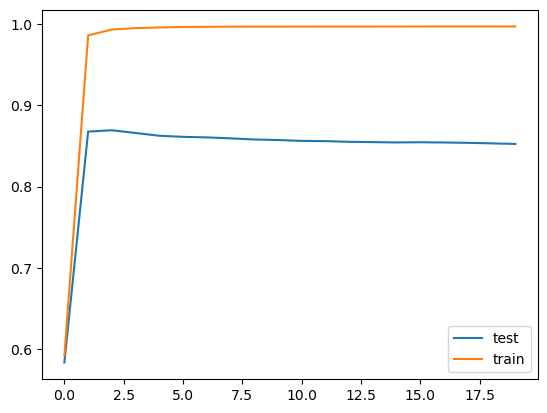

In [92]:
test_scores = linsvc_optimized.cv_results_['mean_test_score']
train_scores = linsvc_optimized.cv_results_['mean_train_score'] 
plt.plot(test_scores, label='test')
plt.plot(train_scores, label='train')
plt.legend(loc='best')
plt.show()

In [93]:
linsvc_optimized_predict = linsvc_optimized.predict(X_test_idf_stem)
print(classification_report(Y_test, linsvc_optimized_predict))

              precision    recall  f1-score   support

         0.0       0.89      0.94      0.91       948
         1.0       0.87      0.77      0.82       494

    accuracy                           0.88      1442
   macro avg       0.88      0.85      0.86      1442
weighted avg       0.88      0.88      0.88      1442



**Дерево решений**

In [94]:
dectree_params = {
                  'max_depth': np.arange (60, 120, 10),
                  'min_samples_leaf': np.arange (1, 16, 4),
                  'min_samples_split': np.arange (60, 100, 1) 
                 }
dectree_optimized = RandomizedSearchCV(dectree, dectree_params, cv=5, scoring='f1_weighted', return_train_score=True)
dectree_optimized.fit(X_train_idf_stem, Y_train)
dectree_optimized.best_estimator_

DecisionTreeClassifier(max_depth=110, min_samples_split=90, random_state=1)

In [95]:
dectree_optimized.best_score_

0.7608461429522835

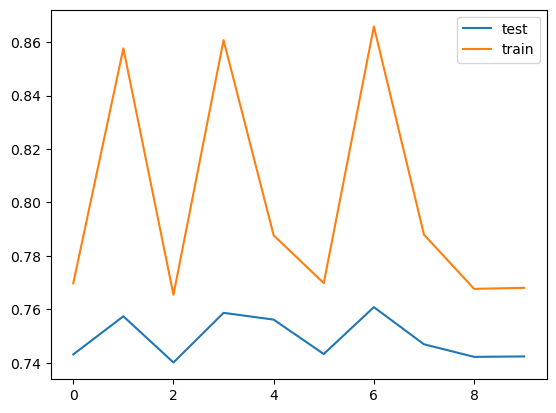

In [96]:
test_scores = dectree_optimized.cv_results_['mean_test_score']
train_scores = dectree_optimized.cv_results_['mean_train_score'] 
plt.plot(test_scores, label='test')
plt.plot(train_scores, label='train')
plt.legend(loc='best')
plt.show()

In [97]:
dectree_optimized_predict = dectree_optimized.predict(X_test_idf_stem)
print(classification_report(Y_test, dectree_optimized_predict))

              precision    recall  f1-score   support

         0.0       0.78      0.92      0.85       948
         1.0       0.78      0.51      0.62       494

    accuracy                           0.78      1442
   macro avg       0.78      0.72      0.73      1442
weighted avg       0.78      0.78      0.77      1442



**Случайный лес**

In [98]:
randfor_params = { 
                'n_estimators': np.arange (1, 100, 1),
                'max_depth': np.arange (1,1000, 20),
                'min_samples_leaf': np.arange (1,50, 1),
                'min_samples_split': np.arange (2,6,1) 
                 }
randfor_optimized = RandomizedSearchCV(randfor, randfor_params, cv=5, scoring='f1_weighted', return_train_score=True)
randfor_optimized.fit(X_train_idf_stem, Y_train)
randfor_optimized.best_estimator_

RandomForestClassifier(max_depth=781, min_samples_leaf=2, n_estimators=62,
                       random_state=1)

In [99]:
randfor_optimized.best_score_

0.8195215101425557

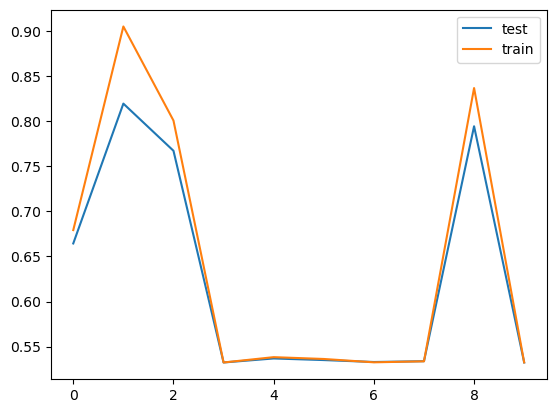

In [100]:
test_scores = randfor_optimized.cv_results_['mean_test_score']
train_scores = randfor_optimized.cv_results_['mean_train_score'] 
plt.plot(test_scores, label='test')
plt.plot(train_scores, label='train')
plt.legend(loc='best')
plt.show()

In [101]:
randfor_optimized_predict = randfor_optimized.predict(X_test_idf_stem)
print(classification_report(Y_test, randfor_optimized_predict))

              precision    recall  f1-score   support

         0.0       0.82      0.95      0.88       948
         1.0       0.86      0.60      0.70       494

    accuracy                           0.83      1442
   macro avg       0.84      0.77      0.79      1442
weighted avg       0.83      0.83      0.82      1442



**Мультиномиальный наивный байесовский классификатор**

In [102]:
MNB_params = { 
                'alpha' : np.arange (0.001, 0.7, 0.01)
             }
MNB_optimized = GridSearchCV(MNB, MNB_params, cv=5, scoring='f1_weighted', return_train_score=True)
MNB_optimized.fit(X_train_idf_stem, Y_train)
MNB_optimized.best_estimator_

MultinomialNB(alpha=0.10099999999999998)

In [103]:
MNB_optimized.best_score_

0.8796371763199409

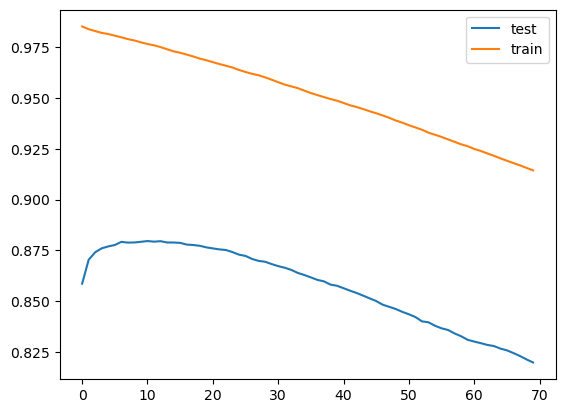

In [104]:
test_scores = MNB_optimized.cv_results_['mean_test_score']
train_scores = MNB_optimized.cv_results_['mean_train_score'] 
plt.plot(test_scores, label='test')
plt.plot(train_scores, label='train')
plt.legend(loc='best')
plt.show()

In [105]:
MNB_optimized_predict = MNB_optimized.predict(X_test_idf_stem)
print(classification_report(Y_test, MNB_optimized_predict))

              precision    recall  f1-score   support

         0.0       0.87      0.94      0.91       948
         1.0       0.86      0.74      0.80       494

    accuracy                           0.87      1442
   macro avg       0.87      0.84      0.85      1442
weighted avg       0.87      0.87      0.87      1442



**K-ближайших соседей**

In [106]:
KNN_params = { 
                'n_neighbors': np.arange (20, 40, 1)
             }
KNN_optimized = GridSearchCV(KNN, KNN_params, cv=5, scoring='f1_weighted', return_train_score=True)
KNN_optimized.fit(X_train_idf_stem, Y_train)
KNN_optimized.best_estimator_

KNeighborsClassifier(n_neighbors=23)

In [107]:
KNN_optimized.best_score_

0.7900805969283902

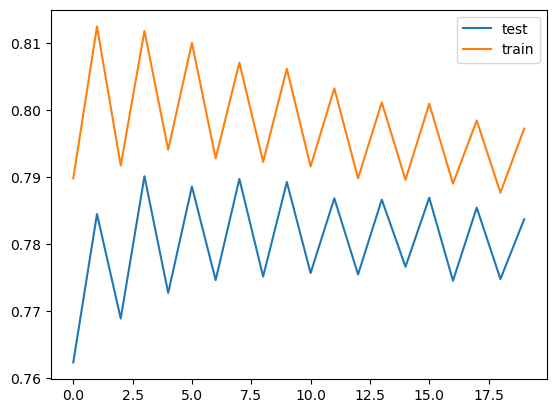

In [108]:
test_scores = KNN_optimized.cv_results_['mean_test_score']
train_scores = KNN_optimized.cv_results_['mean_train_score'] 
plt.plot(test_scores, label='test')
plt.plot(train_scores, label='train')
plt.legend(loc='best')
plt.show()

In [109]:
KNN_optimized_predict = KNN_optimized.predict(X_test_idf_stem)
print(classification_report(Y_test, KNN_optimized_predict))

              precision    recall  f1-score   support

         0.0       0.78      0.99      0.87       948
         1.0       0.95      0.48      0.63       494

    accuracy                           0.81      1442
   macro avg       0.87      0.73      0.75      1442
weighted avg       0.84      0.81      0.79      1442



**Выше мы применили Стемминг во время преобратоки текста, теперь применим Лемматизацию**

Для лемматизации будем использовать лемматизатор из Pymorphy2

In [110]:
morph = pymorphy3.MorphAnalyzer()
def lemmatization_tokenizer(sentence: str, remove_stop_words: bool = True):
    tokens = word_tokenize(sentence, language = 'russian')
    tokens = [i for i in tokens if i not in string.punctuation]
    if remove_stop_words:
        tokens = [i for i in tokens if i not in russian_stop_words]
    tokens = [morph.parse(i)[0].normal_form for i in tokens]
    return tokens

In [111]:
data_preprocessed_lemm = data
data_preprocessed_lemm['comment'] = clean_df(data_preprocessed_lemm['comment'])

In [112]:
comments_preprocessed_lemm = data_preprocessed_lemm['comment'].values
lables_preprocessed_lemm = data_preprocessed_lemm['toxic'].values

In [113]:
X_train, X_test, Y_train, Y_test = train_test_split(
    comments_preprocessed_lemm,
    lables_preprocessed_lemm,
    test_size=0.1,
    random_state=1,
)

In [114]:
idf_lemm_vect = TfidfVectorizer(tokenizer = lambda x: lemmatization_tokenizer(x, remove_stop_words = True), max_features=30_000)
X_train_idf_lemm = idf_stem_vect.fit_transform(X_train)
X_test_idf_lemm = idf_stem_vect.transform(X_test)

**Логистическая регрессия**

In [115]:
%%time
logreg.fit(X_train_idf_lemm, Y_train)
logreg_predict = logreg.predict(X_test_idf_lemm)
print(classification_report(Y_test, logreg_predict))

              precision    recall  f1-score   support

         0.0       0.84      0.97      0.90       948
         1.0       0.91      0.65      0.75       494

    accuracy                           0.86      1442
   macro avg       0.87      0.81      0.83      1442
weighted avg       0.86      0.86      0.85      1442

CPU times: total: 312 ms
Wall time: 331 ms


**Линейный метод опорных векторов**

In [116]:
%%time
linsvc.fit(X_train_idf_lemm, Y_train)
linsvc_predict = linsvc.predict(X_test_idf_lemm)
print(classification_report(Y_test, linsvc_predict))

              precision    recall  f1-score   support

         0.0       0.89      0.94      0.91       948
         1.0       0.87      0.77      0.82       494

    accuracy                           0.88      1442
   macro avg       0.88      0.85      0.86      1442
weighted avg       0.88      0.88      0.88      1442

CPU times: total: 78.1 ms
Wall time: 59.3 ms


**Дерево решений**

In [117]:
%%time
dectree.fit(X_train_idf_lemm, Y_train)
dectree_predict = dectree.predict(X_test_idf_lemm)
print(classification_report(Y_test, dectree_predict))

              precision    recall  f1-score   support

         0.0       0.82      0.88      0.85       948
         1.0       0.73      0.62      0.67       494

    accuracy                           0.79      1442
   macro avg       0.77      0.75      0.76      1442
weighted avg       0.79      0.79      0.79      1442

CPU times: total: 11.4 s
Wall time: 11.4 s


**Случайный лес**

In [118]:
%%time
randfor.fit(X_train_idf_lemm, Y_train)
randfor_predict = randfor.predict(X_test_idf_lemm)
print(classification_report(Y_test, randfor_predict))

              precision    recall  f1-score   support

         0.0       0.83      0.96      0.89       948
         1.0       0.88      0.62      0.72       494

    accuracy                           0.84      1442
   macro avg       0.85      0.79      0.81      1442
weighted avg       0.84      0.84      0.83      1442

CPU times: total: 1min 17s
Wall time: 1min 17s


**Гауссовский наивный байесовский классификатор**

In [119]:
%%time
GNB.fit(X_train_idf_lemm.toarray(), Y_train)
GNB_predict = GNB.predict(X_test_idf_lemm.toarray())
print(classification_report(Y_test, GNB_predict))

              precision    recall  f1-score   support

         0.0       0.83      0.68      0.74       948
         1.0       0.54      0.73      0.62       494

    accuracy                           0.69      1442
   macro avg       0.68      0.70      0.68      1442
weighted avg       0.73      0.69      0.70      1442

CPU times: total: 9.53 s
Wall time: 9.5 s


**Мультиномиальный наивный байесовский классификатор**

In [120]:
%%time
MNB.fit(X_train_idf_lemm, Y_train)
MNB_predict = MNB.predict(X_test_idf_lemm)
print(classification_report(Y_test, MNB_predict))

              precision    recall  f1-score   support

         0.0       0.78      0.99      0.87       948
         1.0       0.95      0.46      0.62       494

    accuracy                           0.81      1442
   macro avg       0.86      0.72      0.75      1442
weighted avg       0.84      0.81      0.78      1442

CPU times: total: 0 ns
Wall time: 5.36 ms


**K-ближайших соседей**

In [121]:
%%time
KNN.fit(X_train_idf_lemm, Y_train)
KNN_predict = KNN.predict(X_test_idf_lemm)
print(classification_report(Y_test, KNN_predict))

              precision    recall  f1-score   support

         0.0       0.67      0.99      0.80       948
         1.0       0.87      0.07      0.13       494

    accuracy                           0.68      1442
   macro avg       0.77      0.53      0.46      1442
weighted avg       0.74      0.68      0.57      1442

CPU times: total: 7.84 s
Wall time: 1.02 s


**Разницы с предобработкой текста со стеммингом нету**

#### Ещё экперименты:

**Линейный метод опорных векторов**

In [122]:
linSVC_params = { 
                'C': np.arange(0.01,10,0.5),
                }
linsvc_optimized = GridSearchCV(linsvc, linSVC_params, cv=5, scoring='f1_weighted', return_train_score=True)
linsvc_optimized.fit(X_train_idf_lemm, Y_train)
linsvc_optimized.best_estimator_

LinearSVC(C=1.01, random_state=1)

In [123]:
linsvc_optimized.best_score_

0.8694849487961033

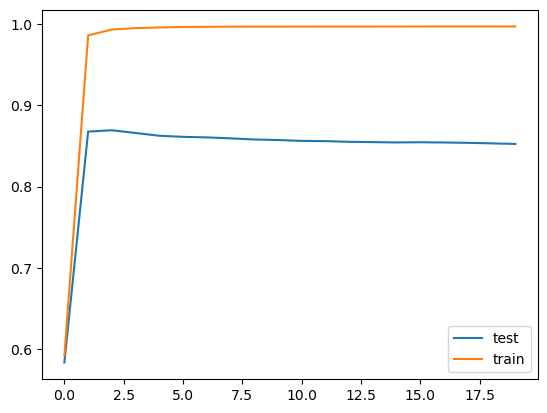

In [124]:
test_scores = linsvc_optimized.cv_results_['mean_test_score']
train_scores = linsvc_optimized.cv_results_['mean_train_score'] 
plt.plot(test_scores, label='test')
plt.plot(train_scores, label='train')
plt.legend(loc='best')
plt.show()

In [125]:
linsvc_optimized_predict = linsvc_optimized.predict(X_test_idf_lemm)
print(classification_report(Y_test, linsvc_optimized_predict))

              precision    recall  f1-score   support

         0.0       0.89      0.94      0.91       948
         1.0       0.87      0.77      0.82       494

    accuracy                           0.88      1442
   macro avg       0.88      0.85      0.86      1442
weighted avg       0.88      0.88      0.88      1442



**Дерево решений**

In [126]:
dectree_params = {
                  'max_depth': np.arange (60, 120, 10),
                  'min_samples_leaf': np.arange (1, 16, 4),
                  'min_samples_split': np.arange (60, 100, 1) 
                 }
dectree_optimized = RandomizedSearchCV(dectree, dectree_params, cv=5, scoring='f1_weighted', return_train_score=True)
dectree_optimized.fit(X_train_idf_lemm, Y_train)
dectree_optimized.best_estimator_

DecisionTreeClassifier(max_depth=110, min_samples_leaf=5, min_samples_split=89,
                       random_state=1)

In [127]:
dectree_optimized.best_score_

0.7642199339738542

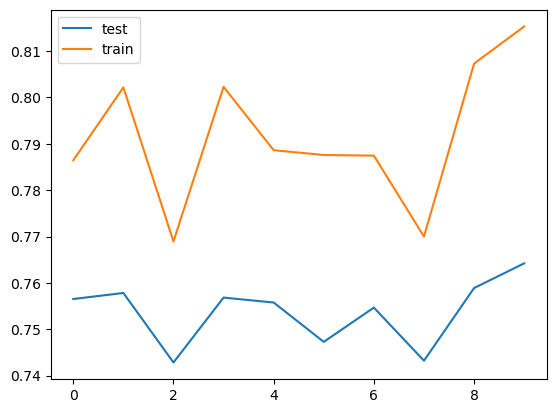

In [128]:
test_scores = dectree_optimized.cv_results_['mean_test_score']
train_scores = dectree_optimized.cv_results_['mean_train_score'] 
plt.plot(test_scores, label='test')
plt.plot(train_scores, label='train')
plt.legend(loc='best')
plt.show()

In [129]:
dectree_optimized_predict = dectree_optimized.predict(X_test_idf_lemm)
print(classification_report(Y_test, dectree_optimized_predict))

              precision    recall  f1-score   support

         0.0       0.78      0.95      0.85       948
         1.0       0.82      0.48      0.60       494

    accuracy                           0.79      1442
   macro avg       0.80      0.71      0.73      1442
weighted avg       0.79      0.79      0.77      1442



**Случайный лес**

In [130]:
randfor_params = { 
                'n_estimators': np.arange (1, 100, 1),
                'max_depth': np.arange (1,1000, 20),
                'min_samples_leaf': np.arange (1,50, 1),
                'min_samples_split': np.arange (2,6,1) 
                 }
randfor_optimized = RandomizedSearchCV(randfor, randfor_params, cv=5, scoring='f1_weighted', return_train_score=True)
randfor_optimized.fit(X_train_idf_lemm, Y_train)
randfor_optimized.best_estimator_

RandomForestClassifier(max_depth=781, min_samples_leaf=3, min_samples_split=3,
                       n_estimators=67, random_state=1)

In [131]:
randfor_optimized.best_score_

0.8128986068301854

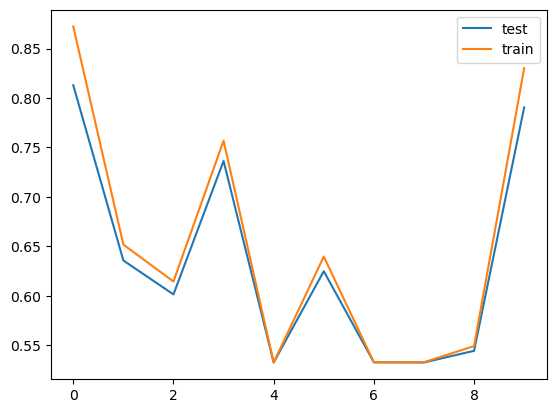

In [132]:
test_scores = randfor_optimized.cv_results_['mean_test_score']
train_scores = randfor_optimized.cv_results_['mean_train_score'] 
plt.plot(test_scores, label='test')
plt.plot(train_scores, label='train')
plt.legend(loc='best')
plt.show()

In [133]:
randfor_optimized_predict = randfor_optimized.predict(X_test_idf_lemm)
print(classification_report(Y_test, randfor_optimized_predict))

              precision    recall  f1-score   support

         0.0       0.81      0.96      0.88       948
         1.0       0.88      0.57      0.69       494

    accuracy                           0.83      1442
   macro avg       0.84      0.77      0.79      1442
weighted avg       0.83      0.83      0.81      1442



**Мультиномиальный наивный байесовский классификатор**

In [134]:
MNB_params = { 
                'alpha' : np.arange (0.001, 0.7, 0.01)
             }
MNB_optimized = GridSearchCV(MNB, MNB_params, cv=5, scoring='f1_weighted', return_train_score=True)
MNB_optimized.fit(X_train_idf_lemm, Y_train)
MNB_optimized.best_estimator_

MultinomialNB(alpha=0.10099999999999998)

In [135]:
MNB_optimized.best_score_

0.8796371763199409

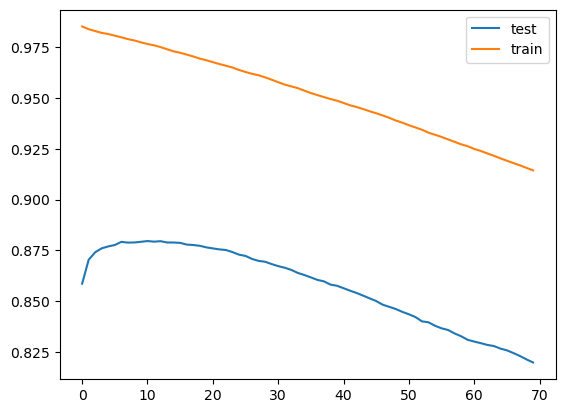

In [136]:
test_scores = MNB_optimized.cv_results_['mean_test_score']
train_scores = MNB_optimized.cv_results_['mean_train_score'] 
plt.plot(test_scores, label='test')
plt.plot(train_scores, label='train')
plt.legend(loc='best')
plt.show()

In [137]:
MNB_optimized_predict = MNB_optimized.predict(X_test_idf_lemm)
print(classification_report(Y_test, MNB_optimized_predict))

              precision    recall  f1-score   support

         0.0       0.87      0.94      0.91       948
         1.0       0.86      0.74      0.80       494

    accuracy                           0.87      1442
   macro avg       0.87      0.84      0.85      1442
weighted avg       0.87      0.87      0.87      1442



**K-ближайших соседей**

In [138]:
KNN_params = { 
                'n_neighbors': np.arange (20, 40, 1)
             }
KNN_optimized = GridSearchCV(KNN, KNN_params, cv=5, scoring='f1_weighted', return_train_score=True)
KNN_optimized.fit(X_train_idf_lemm, Y_train)
KNN_optimized.best_estimator_

KNeighborsClassifier(n_neighbors=23)

In [139]:
KNN_optimized.best_score_

0.7900805969283902

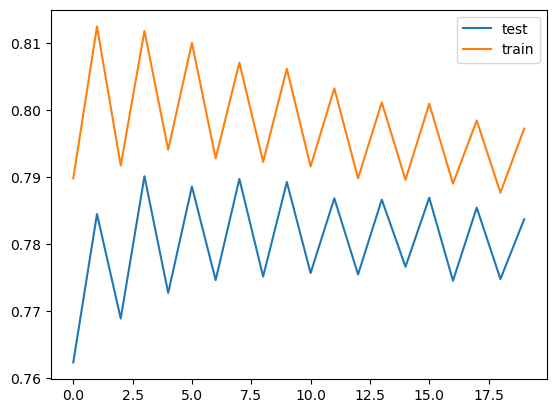

In [140]:
test_scores = KNN_optimized.cv_results_['mean_test_score']
train_scores = KNN_optimized.cv_results_['mean_train_score'] 
plt.plot(test_scores, label='test')
plt.plot(train_scores, label='train')
plt.legend(loc='best')
plt.show()

In [141]:
KNN_optimized_predict = KNN_optimized.predict(X_test_idf_lemm)
print(classification_report(Y_test, KNN_optimized_predict))

              precision    recall  f1-score   support

         0.0       0.78      0.99      0.87       948
         1.0       0.95      0.48      0.63       494

    accuracy                           0.81      1442
   macro avg       0.87      0.73      0.75      1442
weighted avg       0.84      0.81      0.79      1442

